# Querying the *flight phase files*
We introduce here some new methods, that we will use to select the flight segments, querying for different criteria.

## Data access
* To load the data we first load the (AC)³airborne meta data catalogue. More information on the catalog can be found [here](https://github.com/igmk/ac3airborne-intake#ac3airborne-intake-catalogue).

In [1]:
import ac3airborne

In [2]:
cat = ac3airborne.get_intake_catalog()
list(cat.Polar5.GPS_INS)

['ACLOUD_P5_RF04',
 'ACLOUD_P5_RF05',
 'ACLOUD_P5_RF06',
 'ACLOUD_P5_RF07',
 'ACLOUD_P5_RF08',
 'ACLOUD_P5_RF10',
 'ACLOUD_P5_RF11',
 'ACLOUD_P5_RF13',
 'ACLOUD_P5_RF14',
 'ACLOUD_P5_RF15',
 'ACLOUD_P5_RF16',
 'ACLOUD_P5_RF17',
 'ACLOUD_P5_RF18',
 'ACLOUD_P5_RF19',
 'ACLOUD_P5_RF20',
 'ACLOUD_P5_RF21',
 'ACLOUD_P5_RF22',
 'ACLOUD_P5_RF23',
 'ACLOUD_P5_RF25',
 'AFLUX_P5_RF02',
 'AFLUX_P5_RF03',
 'AFLUX_P5_RF04',
 'AFLUX_P5_RF05',
 'AFLUX_P5_RF06',
 'AFLUX_P5_RF07',
 'AFLUX_P5_RF08',
 'AFLUX_P5_RF09',
 'AFLUX_P5_RF10',
 'AFLUX_P5_RF11',
 'AFLUX_P5_RF12',
 'AFLUX_P5_RF13',
 'AFLUX_P5_RF14',
 'AFLUX_P5_RF15',
 'MOSAiC-ACA_P5_RF02',
 'MOSAiC-ACA_P5_RF03',
 'MOSAiC-ACA_P5_RF04',
 'MOSAiC-ACA_P5_RF05',
 'MOSAiC-ACA_P5_RF06',
 'MOSAiC-ACA_P5_RF07',
 'MOSAiC-ACA_P5_RF08',
 'MOSAiC-ACA_P5_RF09',
 'MOSAiC-ACA_P5_RF10',
 'MOSAiC-ACA_P5_RF11']

```{note}
Have a look at the attributes of the xarray dataset `ds_gps` for all relevant information on the dataset, such as author, contact, or citation infromation.
```

In this example we want to look at `ACLOUD_P5_RF14`. First we read the GPS information:

In [3]:
ds_gps = cat['Polar5']['GPS_INS']['ACLOUD_P5_RF14'].to_dask()
ds_gps

<xarray.Dataset>
Dimensions:  (time: 20211)
Coordinates:
  * time     (time) datetime64[ns] 2017-06-08T07:22:07 ... 2017-06-08T12:59:07
Data variables:
    alt      (time) float64 ...
    tas      (time) float64 ...
    lat      (time) float64 ...
    lat_dir  (time) object ...
    lon      (time) float64 ...
    lon_dir  (time) object ...
    vs       (time) float64 ...
    gs       (time) float64 ...
    pitch    (time) float64 ...
    roll     (time) float64 ...
    heading  (time) float64 ...
Attributes: (12/14)
    description:  1Hz subset based on GPS1 and INS data processed by AWI engi...
    instruments:  GPS1 and INS
    version:      [0.1]
    contact:      mario.mech@uni-koeln.de, martin.gehrmann@awi.de
    institution:  ['Alfred-Wegener-Institut Helmholtz-Zentrum für Polar- und ...
    author:       Dr. Mario Mech
    ...           ...
    featureType:  trajectory
    mission:      ACLOUD
    platform:     Polar5
    flight_id:    RF14
    title:        Polar5 position and attitude data
    history:      acquired by Polar5 during ACLOUD campaign, quality checked ...

## Import flightphase module

In [4]:
from ac3airborne.tools import flightphase

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
plt.style.use("../mplstyle/book")

## Load Polar 5 flight phase information
Polar 5 flights are divided into segments to easily access start and end times of flight patterns. For more information have a look at the respective [github](https://github.com/igmk/flight-phase-separation) repository.

At first we want to load the flight segments of (AC)³airborne

In [6]:
meta = ac3airborne.get_flight_segments() 

The next step is to select the flight segments of our flight:

In [7]:
flight = meta['P5']['ACLOUD_P5_RF14']

In [8]:
flight_query = flightphase.FlightPhaseFile(flight)

## Plot entire flight

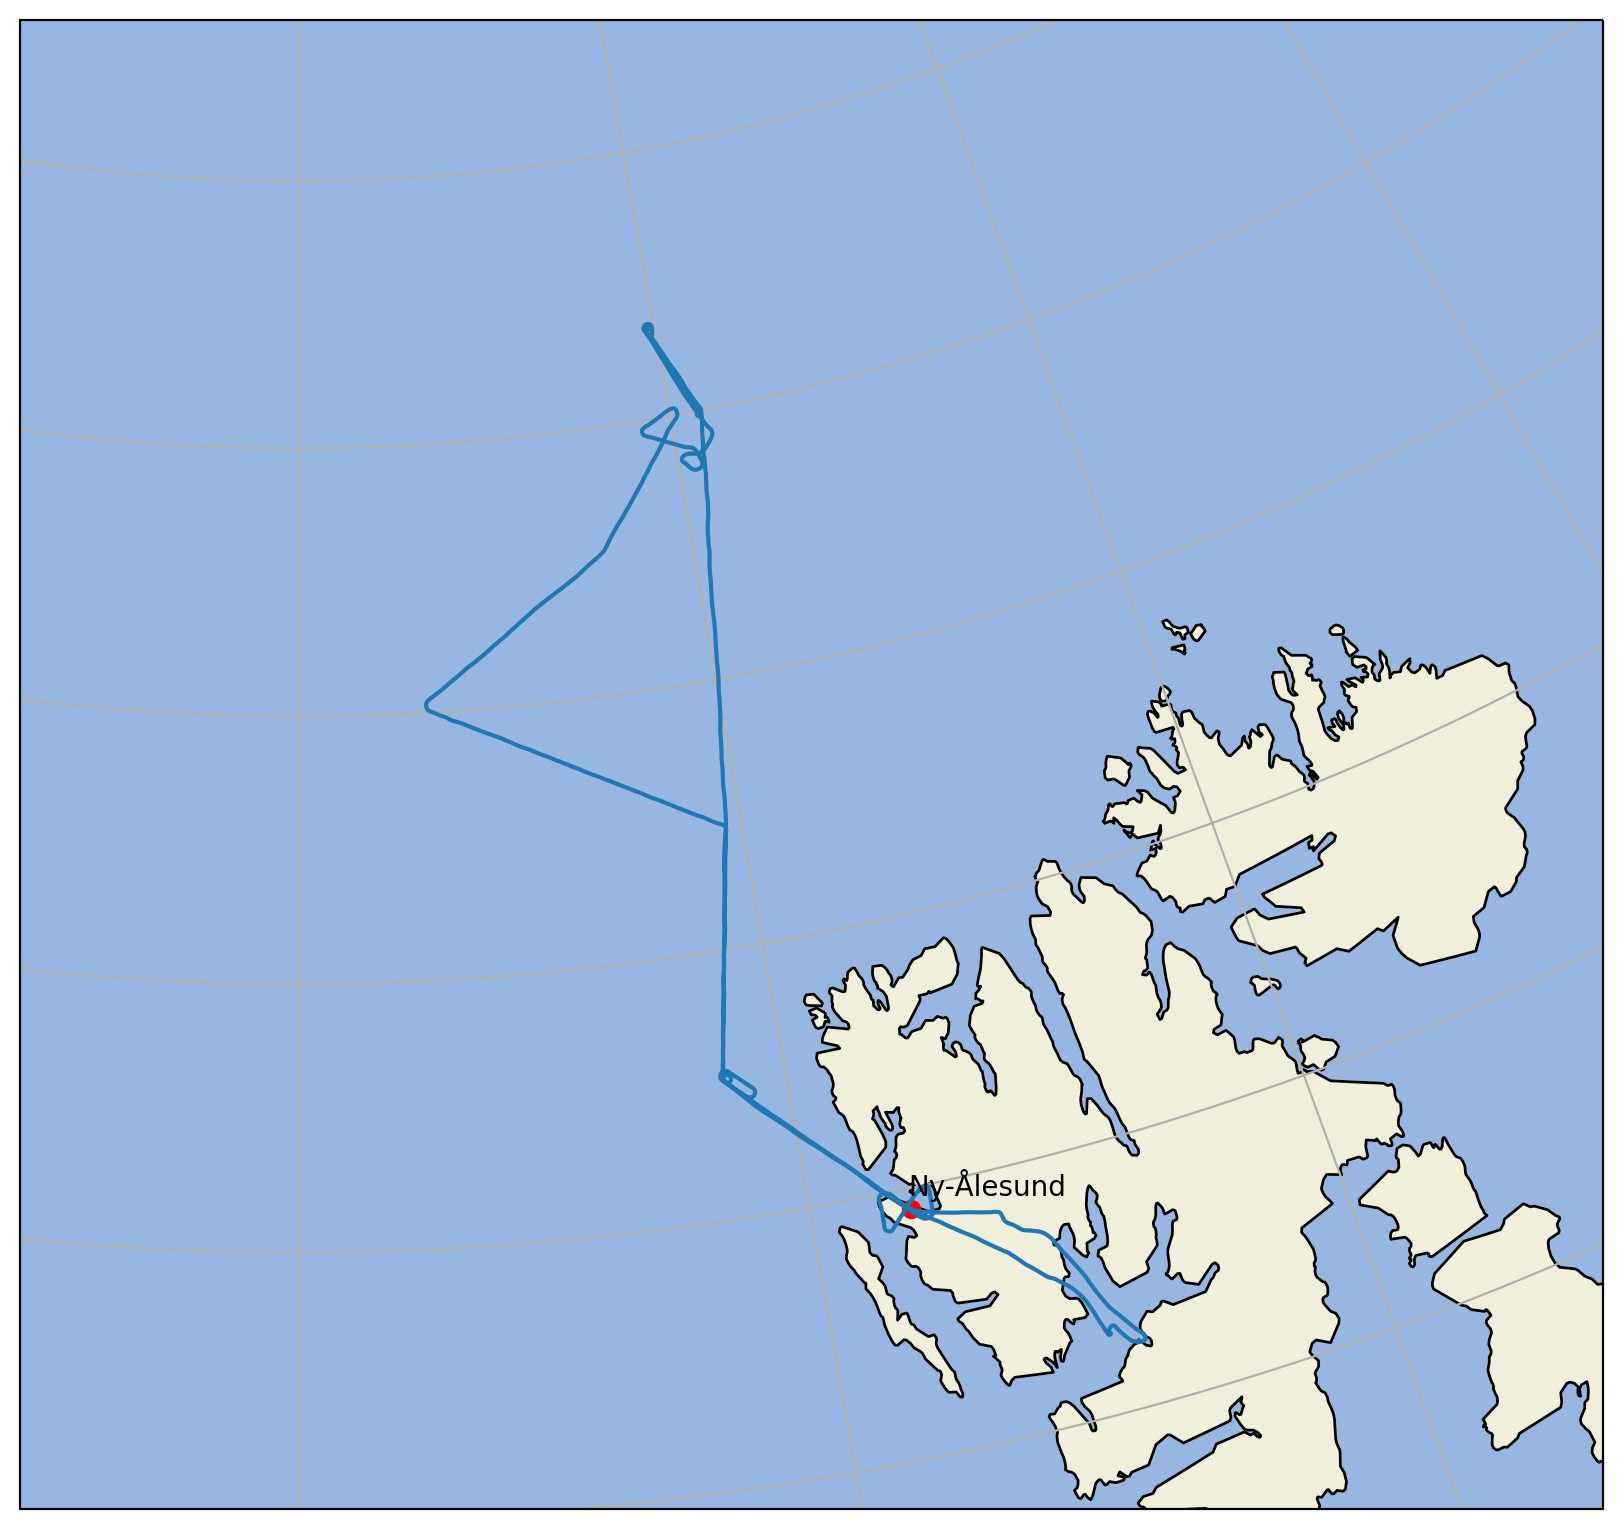

In [9]:
proj = ccrs.NorthPolarStereo()
extent = (-5.0, 24.0, 78.0, 83.0)

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=proj)
ax.set_extent(extent)

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.gridlines()
ax.coastlines()

nya_lat = 78.924444
nya_lon = 11.928611

ax.plot(nya_lon, nya_lat, 'ro', transform=ccrs.PlateCarree())
ax.text(nya_lon, nya_lat+0.05, 'Ny-Ålesund', transform=ccrs.PlateCarree())

line_all = ax.plot(ds_gps.lon, ds_gps.lat, transform=ccrs.PlateCarree())

plt.show()

### Query all segments of a specific kind

Example with one kind

In [10]:
queried = flight_query.selectKind(['high_level'])
queried

[{'dropsondes': [],
  'end': datetime.datetime(2017, 6, 8, 8, 25, 56),
  'irregularities': [],
  'kinds': ['high_level'],
  'levels': [9800],
  'name': 'high level 1',
  'segment_id': 'ACLOUD_P5_RF14_hl01',
  'start': datetime.datetime(2017, 6, 8, 8, 8, 54)},
 {'dropsondes': ['ACLOUD_P5_RF14_DS01'],
  'end': datetime.datetime(2017, 6, 8, 8, 58, 25),
  'irregularities': [],
  'kinds': ['high_level'],
  'levels': [9800],
  'name': 'high level 2',
  'segment_id': 'ACLOUD_P5_RF14_hl02',
  'start': datetime.datetime(2017, 6, 8, 8, 36, 30)},
 {'dropsondes': ['ACLOUD_P5_RF14_DS02', 'ACLOUD_P5_RF14_DS03'],
  'end': datetime.datetime(2017, 6, 8, 9, 30, 29),
  'irregularities': [],
  'kinds': ['high_level', 'a-train_underflight'],
  'levels': [9700],
  'name': 'high level 3',
  'segment_id': 'ACLOUD_P5_RF14_hl03',
  'start': datetime.datetime(2017, 6, 8, 8, 59, 8)},
 {'dropsondes': ['ACLOUD_P5_RF14_DS04'],
  'end': datetime.datetime(2017, 6, 8, 9, 51, 3),
  'irregularities': [],
  'kinds': ['hig

Plot the selected segments:

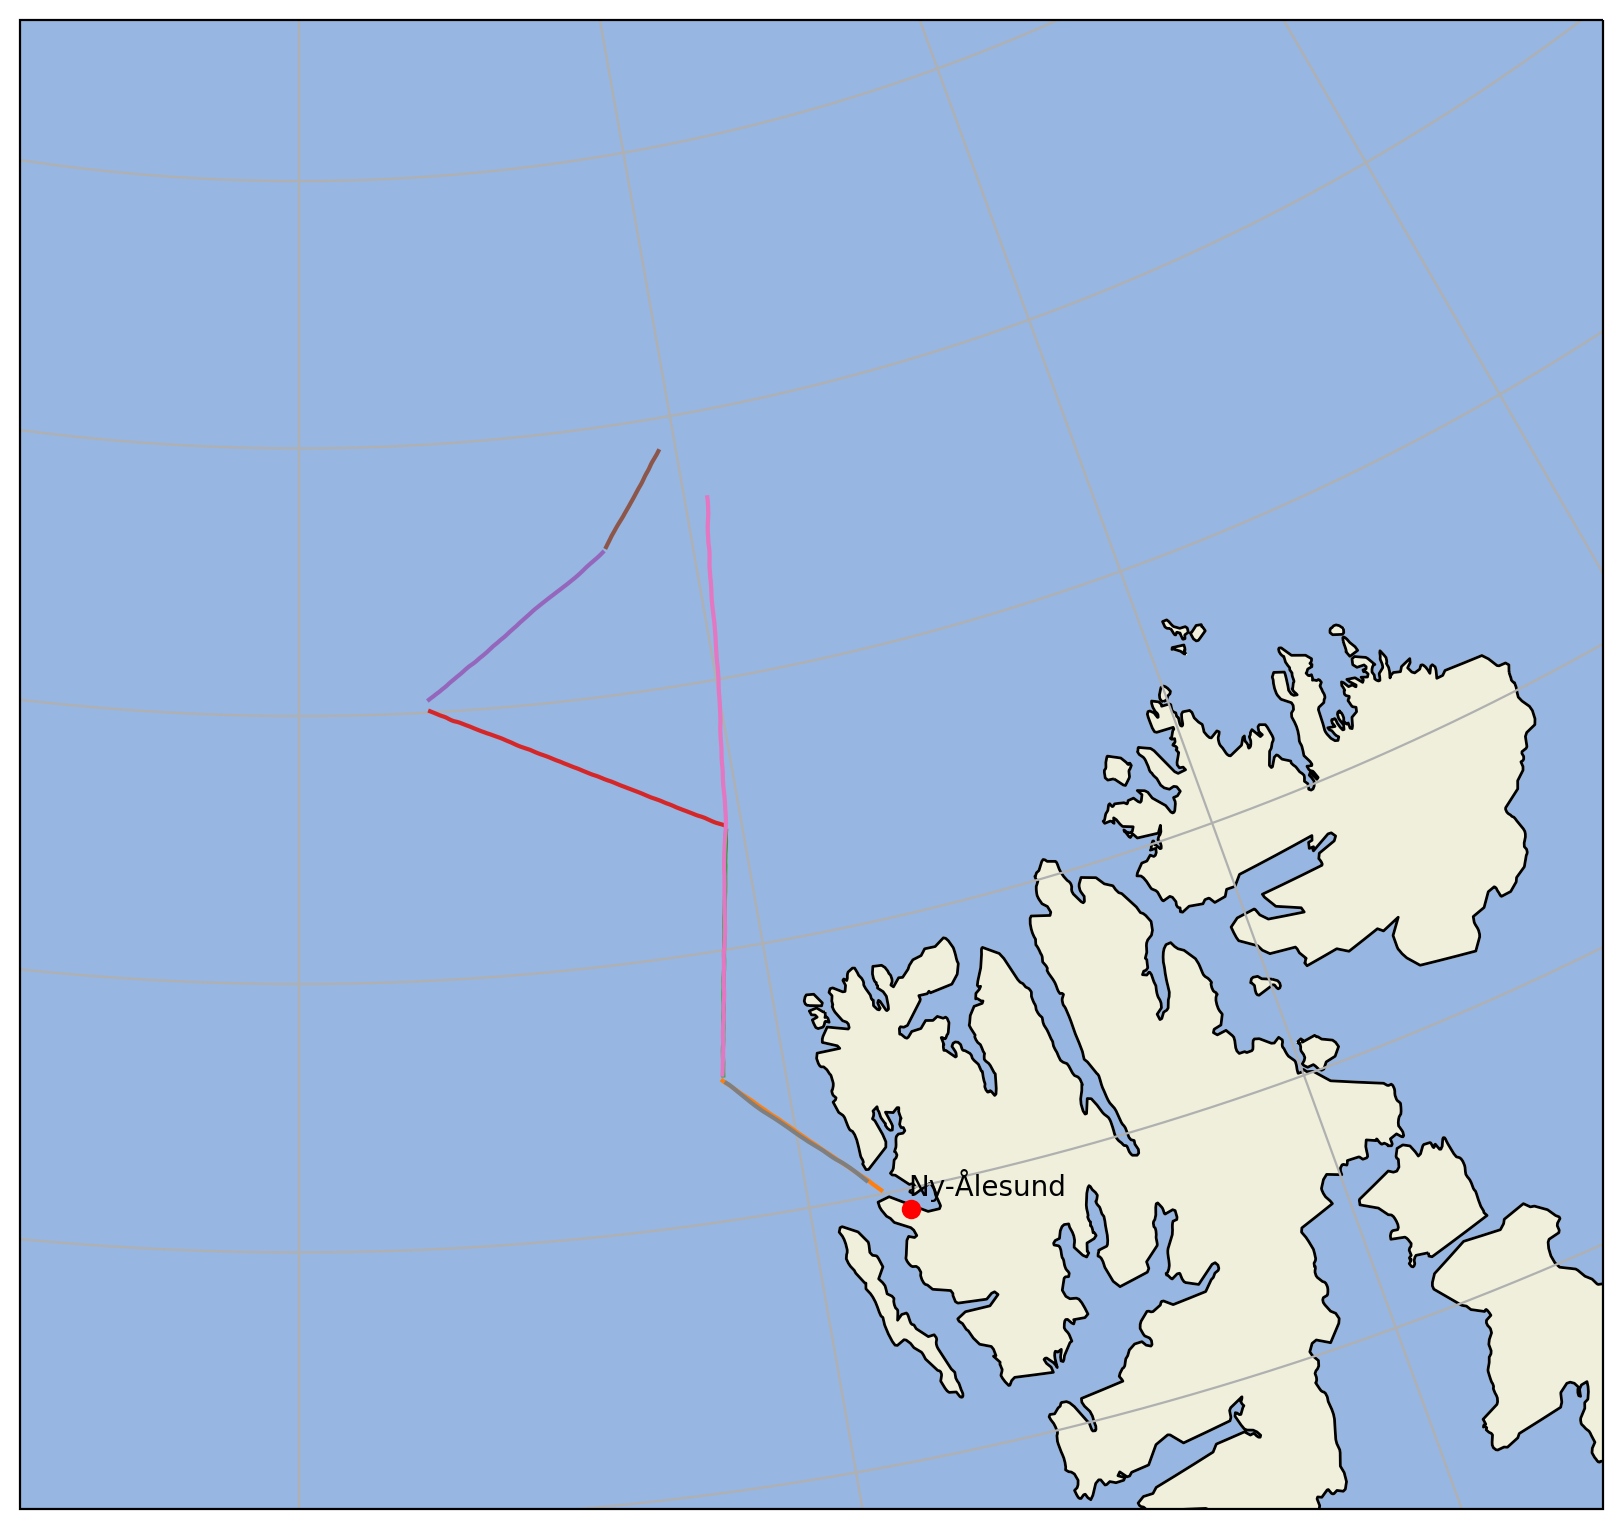

In [11]:
ll = line_all.pop(0)
ll.remove()

lines = []
for q in queried:
    start = q['start']
    end   = q['end']
    
    line = ax.plot(ds_gps.lon.sel(time=slice(start, end)),
                   ds_gps.lat.sel(time=slice(start, end)),
                   transform=ccrs.PlateCarree())
    lines.append(line)
    
fig

 Example with more than one kind

In [12]:
kinds = ['a-train_underflight', 'nya_overflight', 'polarstern_overflight']

queried = flight_query.selectKind(kinds)
queried

[{'dropsondes': [],
  'end': datetime.datetime(2017, 6, 8, 8, 8, 53),
  'irregularities': ['whale-watching loop'],
  'kinds': ['major_ascend', 'nya_overflight', 'sveabreen_glacier_overflight'],
  'levels': [100, 9700],
  'name': 'major ascend',
  'segment_id': 'ACLOUD_P5_RF14_ma',
  'start': datetime.datetime(2017, 6, 8, 7, 36, 50)},
 {'dropsondes': ['ACLOUD_P5_RF14_DS02', 'ACLOUD_P5_RF14_DS03'],
  'end': datetime.datetime(2017, 6, 8, 9, 30, 29),
  'irregularities': [],
  'kinds': ['high_level', 'a-train_underflight'],
  'levels': [9700],
  'name': 'high level 3',
  'segment_id': 'ACLOUD_P5_RF14_hl03',
  'start': datetime.datetime(2017, 6, 8, 8, 59, 8)},
 {'dropsondes': [],
  'end': datetime.datetime(2017, 6, 8, 10, 10, 50),
  'irregularities': [],
  'kinds': ['cross_pattern', 'polarstern_overflight'],
  'levels': [9600, 9700],
  'name': 'cross pattern 1',
  'parts': [{'end': datetime.datetime(2017, 6, 8, 10, 3, 13),
    'irregularities': [],
    'kinds': ['high_level'],
    'levels': 

Plot the selected segments:

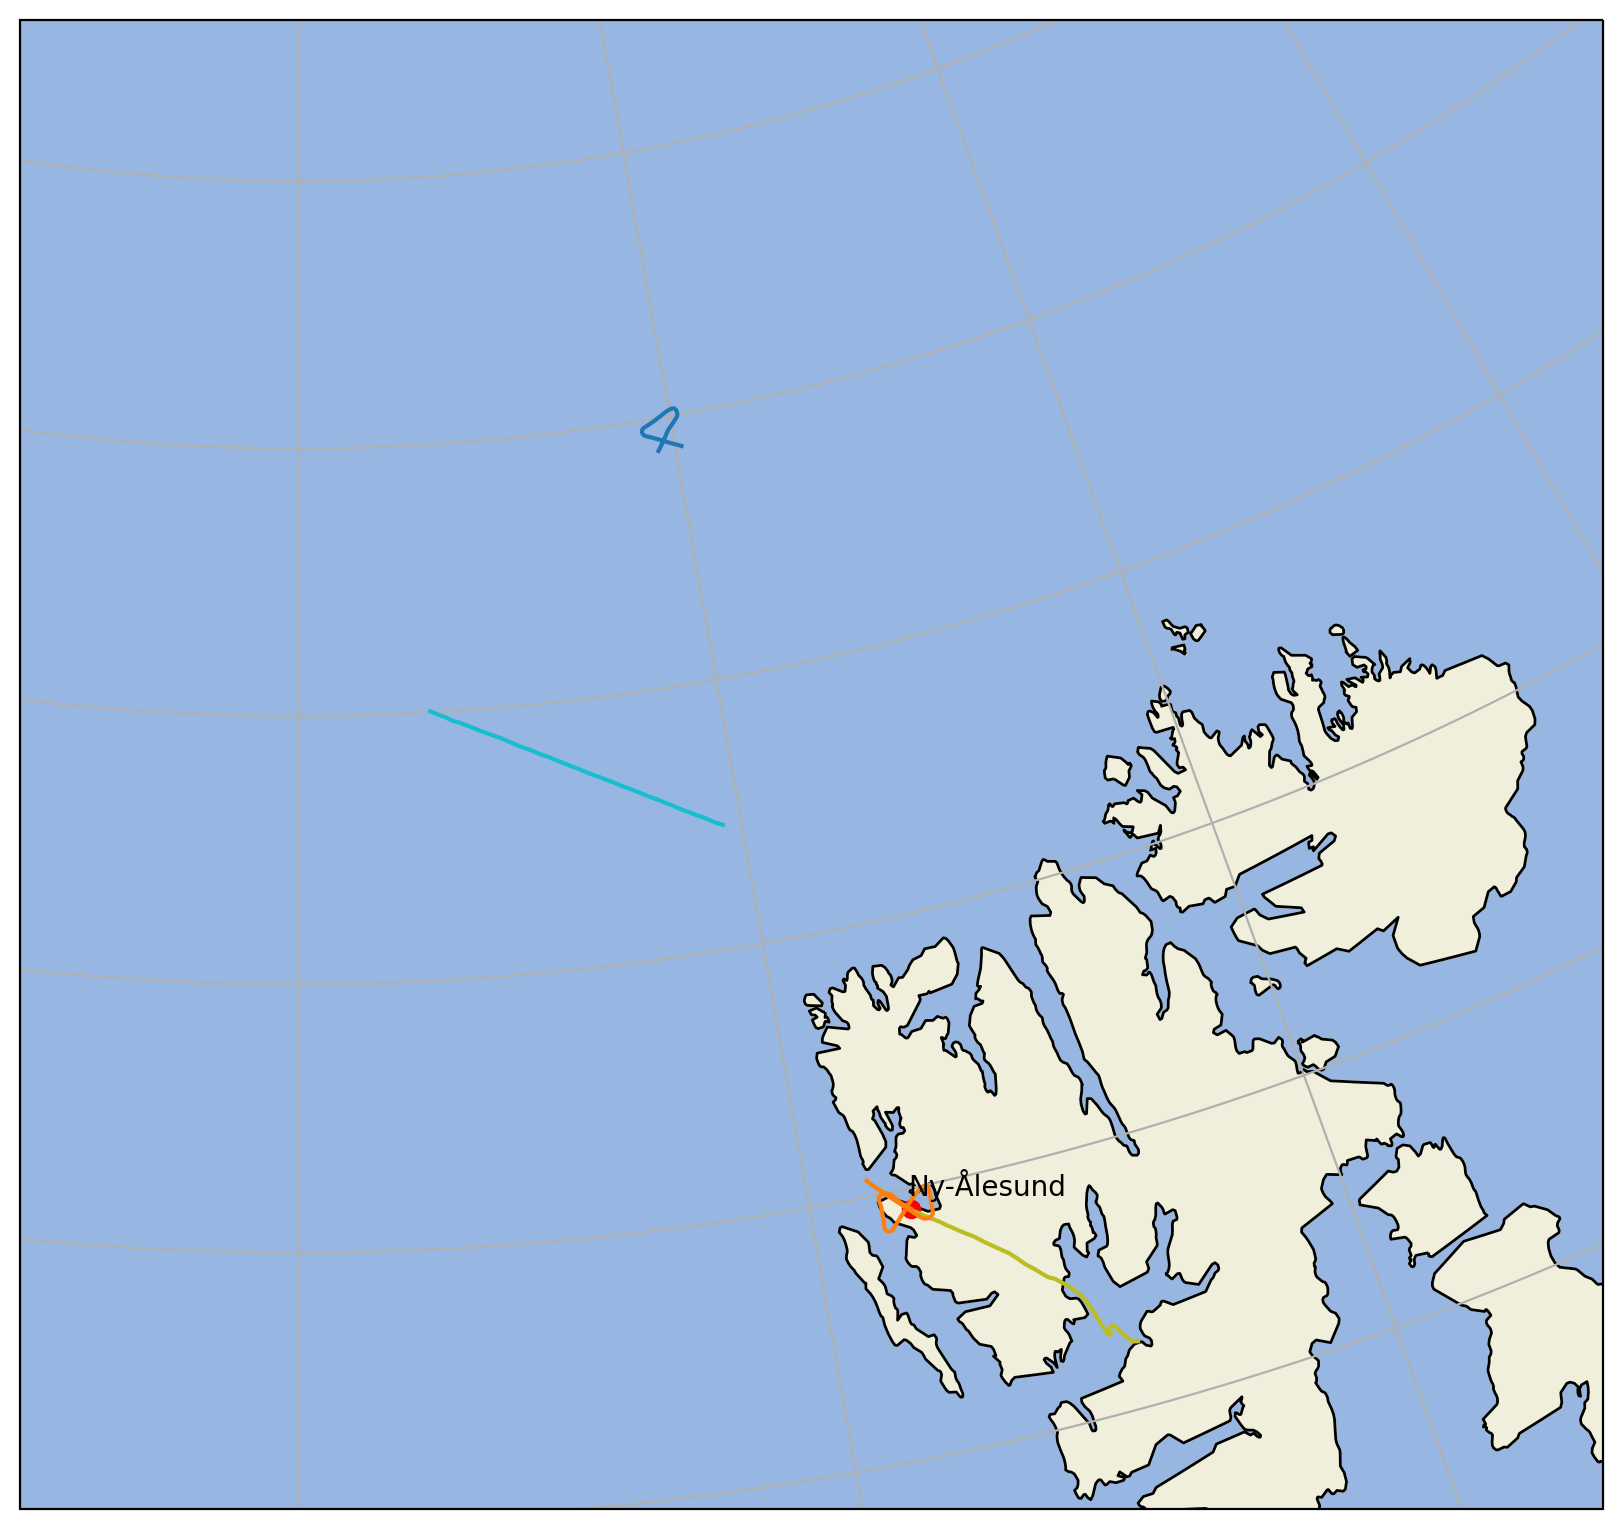

In [13]:
for l in lines:
    ll = l.pop(0)
    ll.remove()
    
lines = []
for q in queried:
    start = q['start']
    end   = q['end']
    
    line = ax.plot(ds_gps.lon.sel(time=slice(start, end)),
                   ds_gps.lat.sel(time=slice(start, end)),
                   transform=ccrs.PlateCarree())
    lines.append(line)
    
fig

### Sorting out all segments given a list of kinds

In [14]:
sort_out = ['short_turn', 'holding_pattern', 'major_ascend', 'major_descend', 'high_level']

queried = flight_query.selectKind(sort_out, invertSelection=True)
queried

[{'dropsondes': [],
  'end': datetime.datetime(2017, 6, 8, 10, 10, 50),
  'irregularities': [],
  'kinds': ['cross_pattern', 'polarstern_overflight'],
  'levels': [9600, 9700],
  'name': 'cross pattern 1',
  'parts': [{'end': datetime.datetime(2017, 6, 8, 10, 3, 13),
    'irregularities': [],
    'kinds': ['high_level'],
    'levels': [9600],
    'name': 'cross pattern 1 leg 1',
    'segment_id': 'ACLOUD_P5_RF14_cr01_l01',
    'start': datetime.datetime(2017, 6, 8, 10, 0, 14)},
   {'end': datetime.datetime(2017, 6, 8, 10, 8, 12),
    'kinds': ['cross_pattern_turn'],
    'name': 'cross pattern turn',
    'start': datetime.datetime(2017, 6, 8, 10, 3, 14)},
   {'end': datetime.datetime(2017, 6, 8, 10, 10, 50),
    'irregularities': [],
    'kinds': ['high_level'],
    'levels': [9700],
    'name': 'cross pattern 1 leg 2',
    'segment_id': 'ACLOUD_P5_RF14_cr01_l02',
    'start': datetime.datetime(2017, 6, 8, 10, 8, 13)}],
  'segment_id': 'ACLOUD_P5_RF14_cr01',
  'start': datetime.datetime

Plot the selected segments:

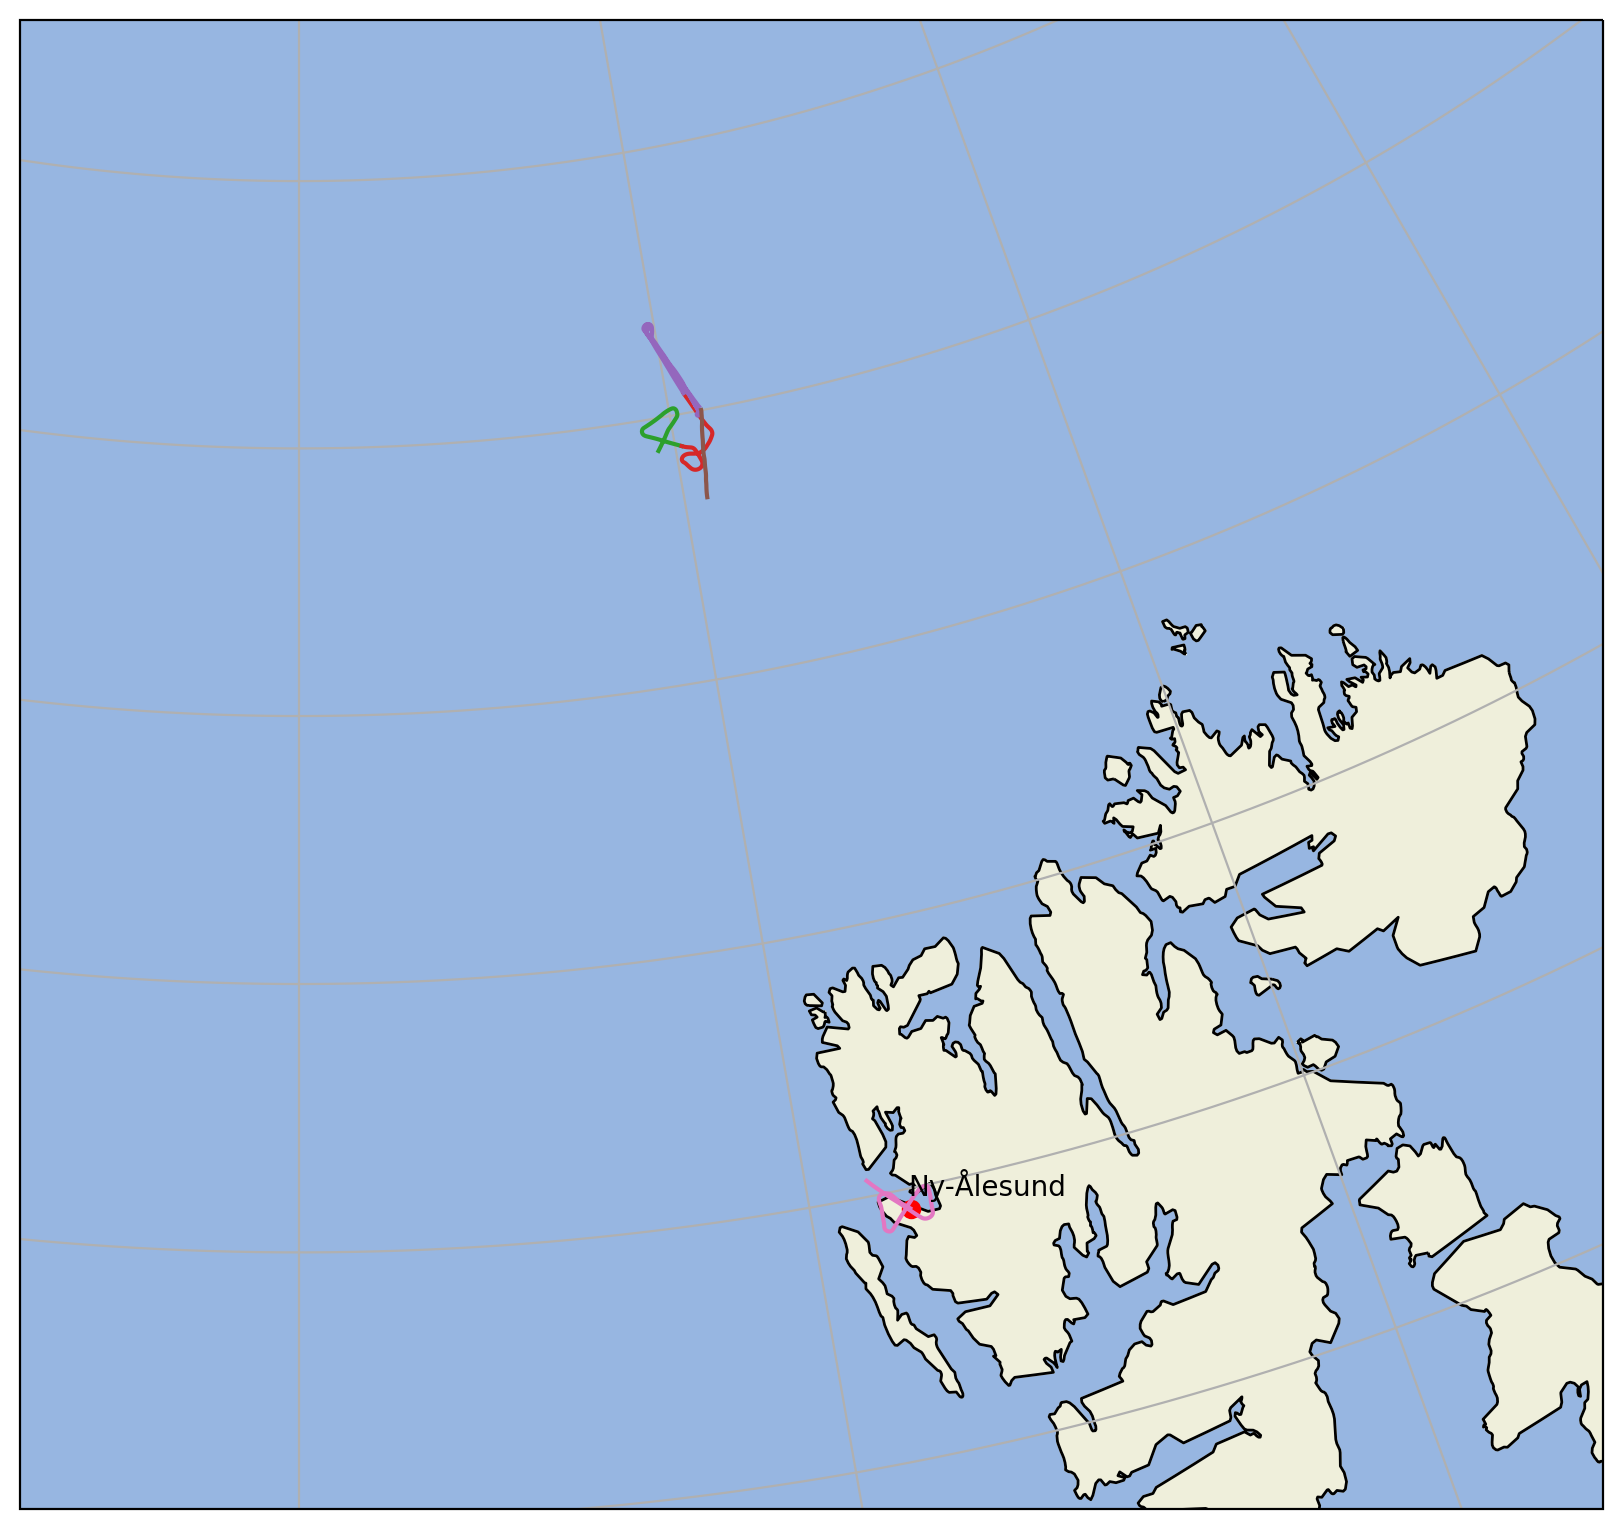

In [15]:
for l in lines:
    ll = l.pop(0)
    ll.remove()
    
lines = []
for q in queried:
    start = q['start']
    end   = q['end']
    
    line = ax.plot(ds_gps.lon.sel(time=slice(start, end)),
                   ds_gps.lat.sel(time=slice(start, end)),
                   transform=ccrs.PlateCarree())
    lines.append(line)
    
fig

### Query a segment with a specific value in a specific attribute

#### Example 1: Select element with specific name

In [16]:
attribute = 'name'
value = 'racetrack pattern 1'

queried = flight_query.select(attribute, value) 
queried

[{'dropsondes': [],
  'end': datetime.datetime(2017, 6, 8, 11, 2, 1),
  'irregularities': [],
  'kinds': ['racetrack_pattern'],
  'levels': [200, 300, 1500, 2400],
  'name': 'racetrack pattern 1',
  'parts': [{'end': datetime.datetime(2017, 6, 8, 10, 29, 20),
    'irregularities': [],
    'kinds': ['low_level'],
    'levels': [200],
    'name': 'racetrack pattern 1 leg 1',
    'segment_id': 'ACLOUD_P5_RF14_rt01_l01',
    'start': datetime.datetime(2017, 6, 8, 10, 22, 44)},
   {'end': datetime.datetime(2017, 6, 8, 10, 31, 40),
    'irregularities': [],
    'kinds': ['procedure_turn', 'small_ascend'],
    'levels': [200, 300],
    'name': 'racetrack pattern 1 ascend 1',
    'segment_id': 'ACLOUD_P5_RF14_rt01_a01',
    'start': datetime.datetime(2017, 6, 8, 10, 29, 21)},
   {'end': datetime.datetime(2017, 6, 8, 10, 40, 26),
    'irregularities': [],
    'kinds': ['low_level'],
    'levels': [300],
    'name': 'racetrack pattern 1 leg 2',
    'segment_id': 'ACLOUD_P5_RF14_rt01_l02',
    's

Plot the selected elements:

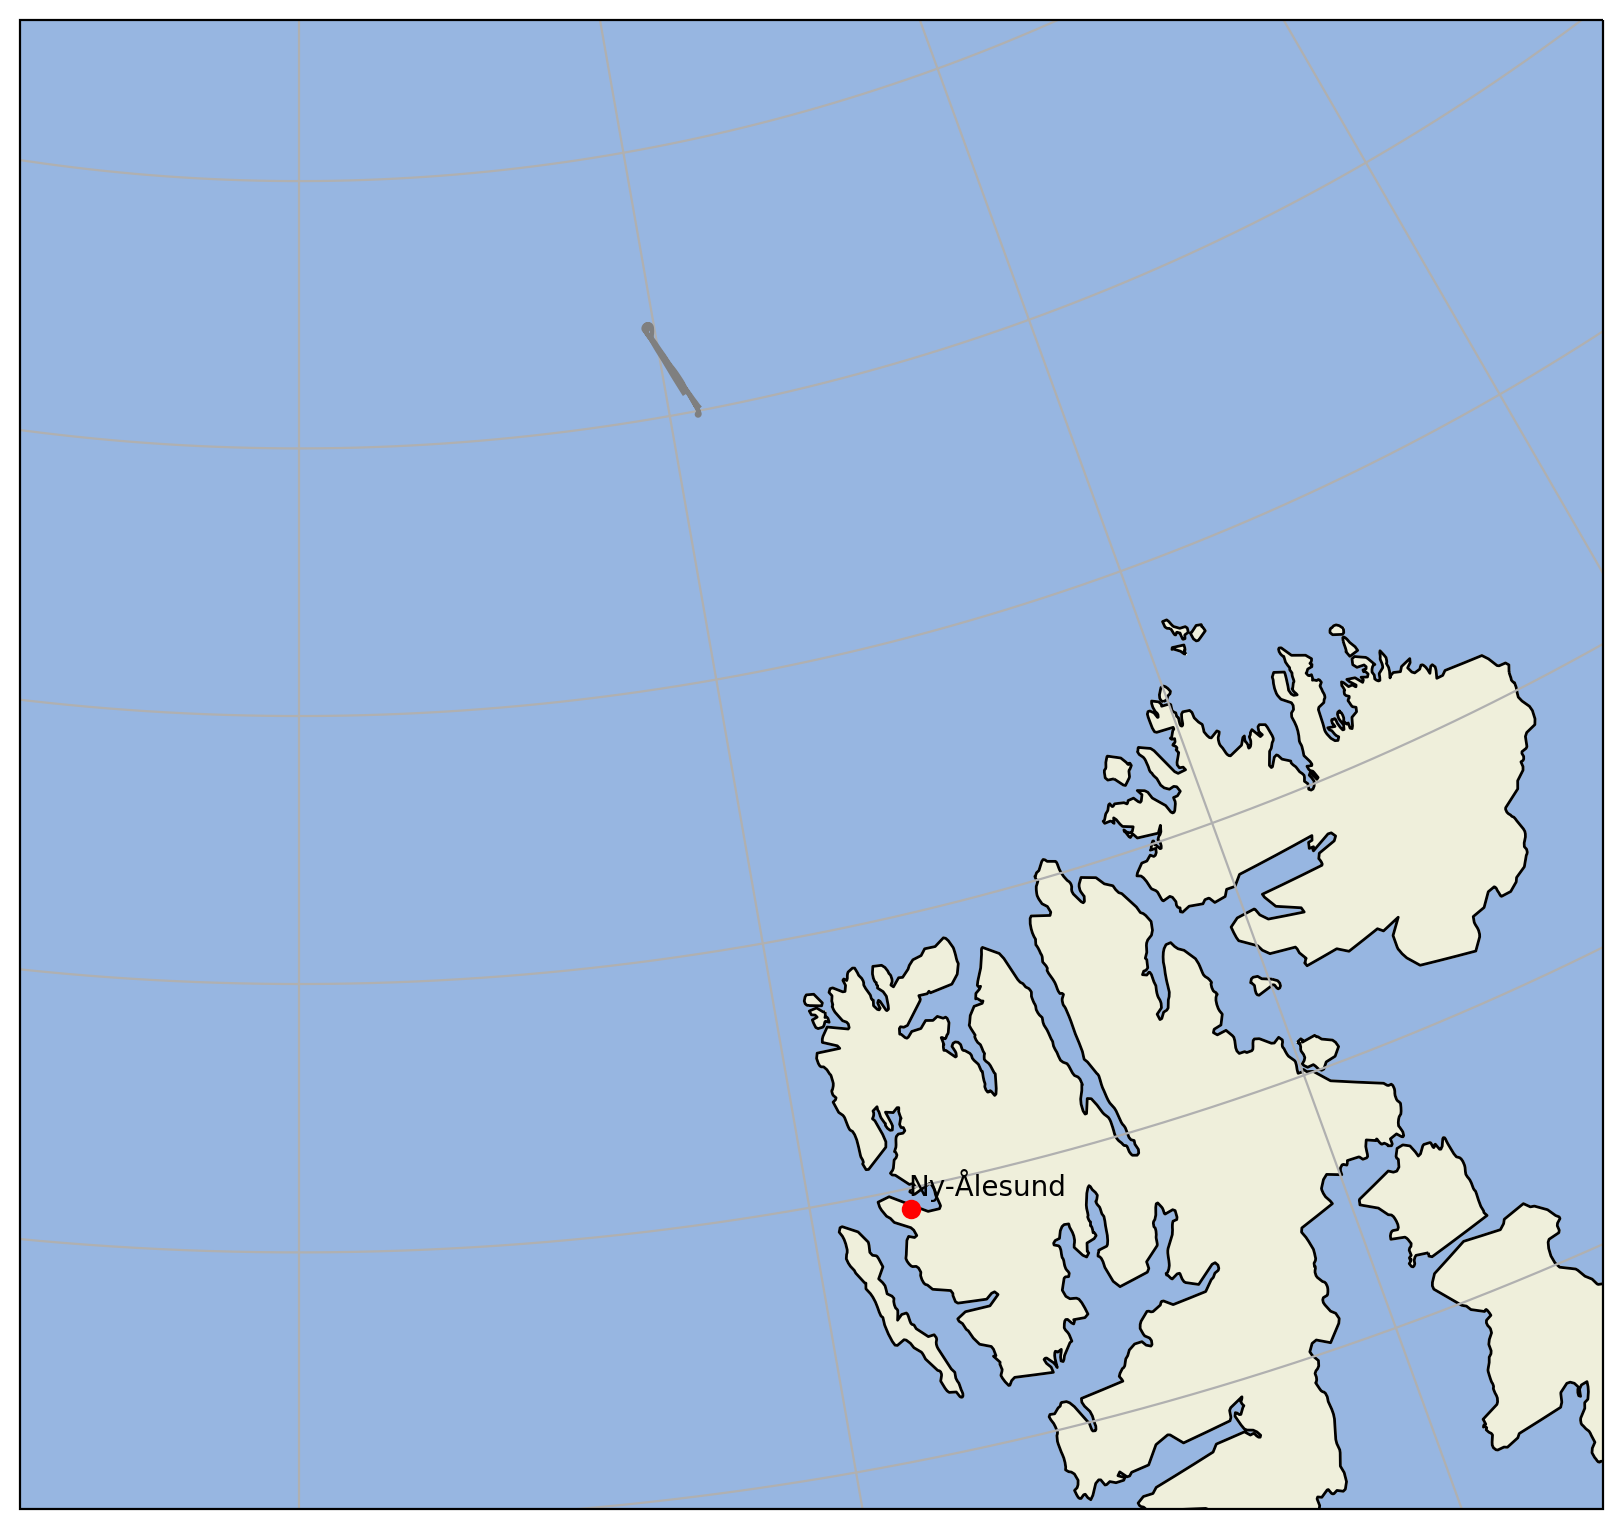

In [17]:
for l in lines:
    ll = l.pop(0)
    ll.remove()
    
lines = []
for q in queried:
    start = q['start']
    end   = q['end']
    
    line = ax.plot(ds_gps.lon.sel(time=slice(start, end)),
                   ds_gps.lat.sel(time=slice(start, end)),
                   transform=ccrs.PlateCarree())
    lines.append(line)
    
fig

Also with inverted selection

In [18]:
queried = flight_query.select(attribute, value, invertSelection=True) 
queried

[{'dropsondes': [],
  'end': datetime.datetime(2017, 6, 8, 8, 8, 53),
  'irregularities': ['whale-watching loop'],
  'kinds': ['major_ascend', 'nya_overflight', 'sveabreen_glacier_overflight'],
  'levels': [100, 9700],
  'name': 'major ascend',
  'segment_id': 'ACLOUD_P5_RF14_ma',
  'start': datetime.datetime(2017, 6, 8, 7, 36, 50)},
 {'dropsondes': [],
  'end': datetime.datetime(2017, 6, 8, 8, 25, 56),
  'irregularities': [],
  'kinds': ['high_level'],
  'levels': [9800],
  'name': 'high level 1',
  'segment_id': 'ACLOUD_P5_RF14_hl01',
  'start': datetime.datetime(2017, 6, 8, 8, 8, 54)},
 {'dropsondes': [],
  'end': datetime.datetime(2017, 6, 8, 8, 36, 29),
  'irregularities': [],
  'kinds': ['holding_pattern'],
  'levels': [9800, 9800],
  'name': 'holding pattern 1',
  'parts': [{'end': datetime.datetime(2017, 6, 8, 8, 27, 32),
    'kinds': ['short_turn'],
    'name': 'short turn',
    'start': datetime.datetime(2017, 6, 8, 8, 25, 57)},
   {'end': datetime.datetime(2017, 6, 8, 8, 29,

Plot the selected elements:

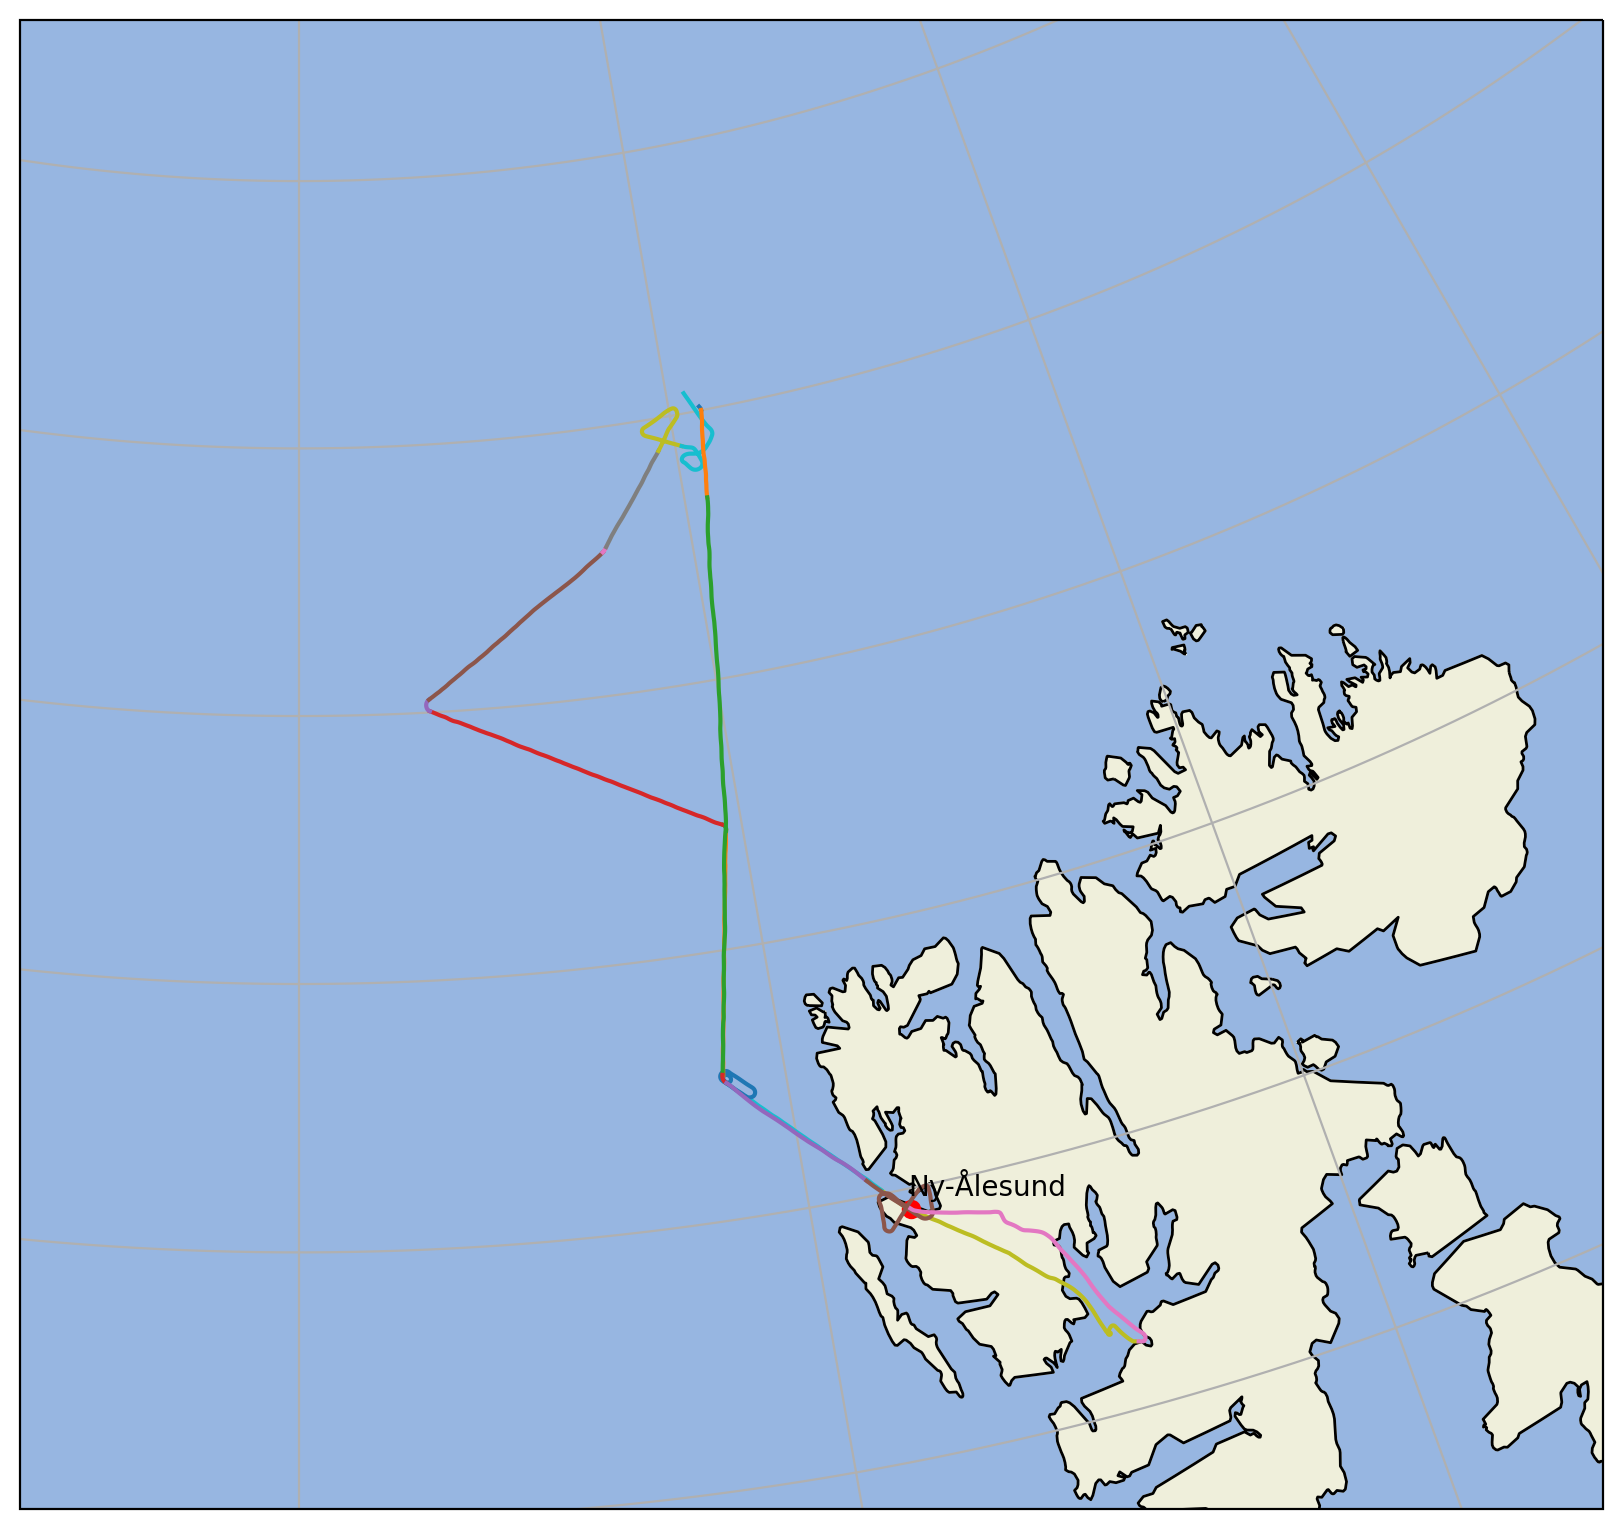

In [19]:
for l in lines:
    ll = l.pop(0)
    ll.remove()
    
lines = []
for q in queried:
    start = q['start']
    end   = q['end']
    
    line = ax.plot(ds_gps.lon.sel(time=slice(start, end)),
                   ds_gps.lat.sel(time=slice(start, end)),
                   transform=ccrs.PlateCarree())
    lines.append(line)
    
fig

#### Example 2: Specific level

In [20]:
attribute = 'levels'
value = 9800

queried = flight_query.select(attribute, value)
queried

[{'dropsondes': [],
  'end': datetime.datetime(2017, 6, 8, 8, 25, 56),
  'irregularities': [],
  'kinds': ['high_level'],
  'levels': [9800],
  'name': 'high level 1',
  'segment_id': 'ACLOUD_P5_RF14_hl01',
  'start': datetime.datetime(2017, 6, 8, 8, 8, 54)},
 {'dropsondes': [],
  'end': datetime.datetime(2017, 6, 8, 8, 36, 29),
  'irregularities': [],
  'kinds': ['holding_pattern'],
  'levels': [9800, 9800],
  'name': 'holding pattern 1',
  'parts': [{'end': datetime.datetime(2017, 6, 8, 8, 27, 32),
    'kinds': ['short_turn'],
    'name': 'short turn',
    'start': datetime.datetime(2017, 6, 8, 8, 25, 57)},
   {'end': datetime.datetime(2017, 6, 8, 8, 29, 27),
    'irregularities': [],
    'kinds': ['high_level'],
    'levels': [9800],
    'name': 'holding pattern 1 leg 1',
    'segment_id': 'ACLOUD_P5_RF14_ho01_l01',
    'start': datetime.datetime(2017, 6, 8, 8, 27, 33)},
   {'end': datetime.datetime(2017, 6, 8, 8, 31, 9),
    'kinds': ['short_turn'],
    'name': 'short turn',
    's

Plot the selected elements:

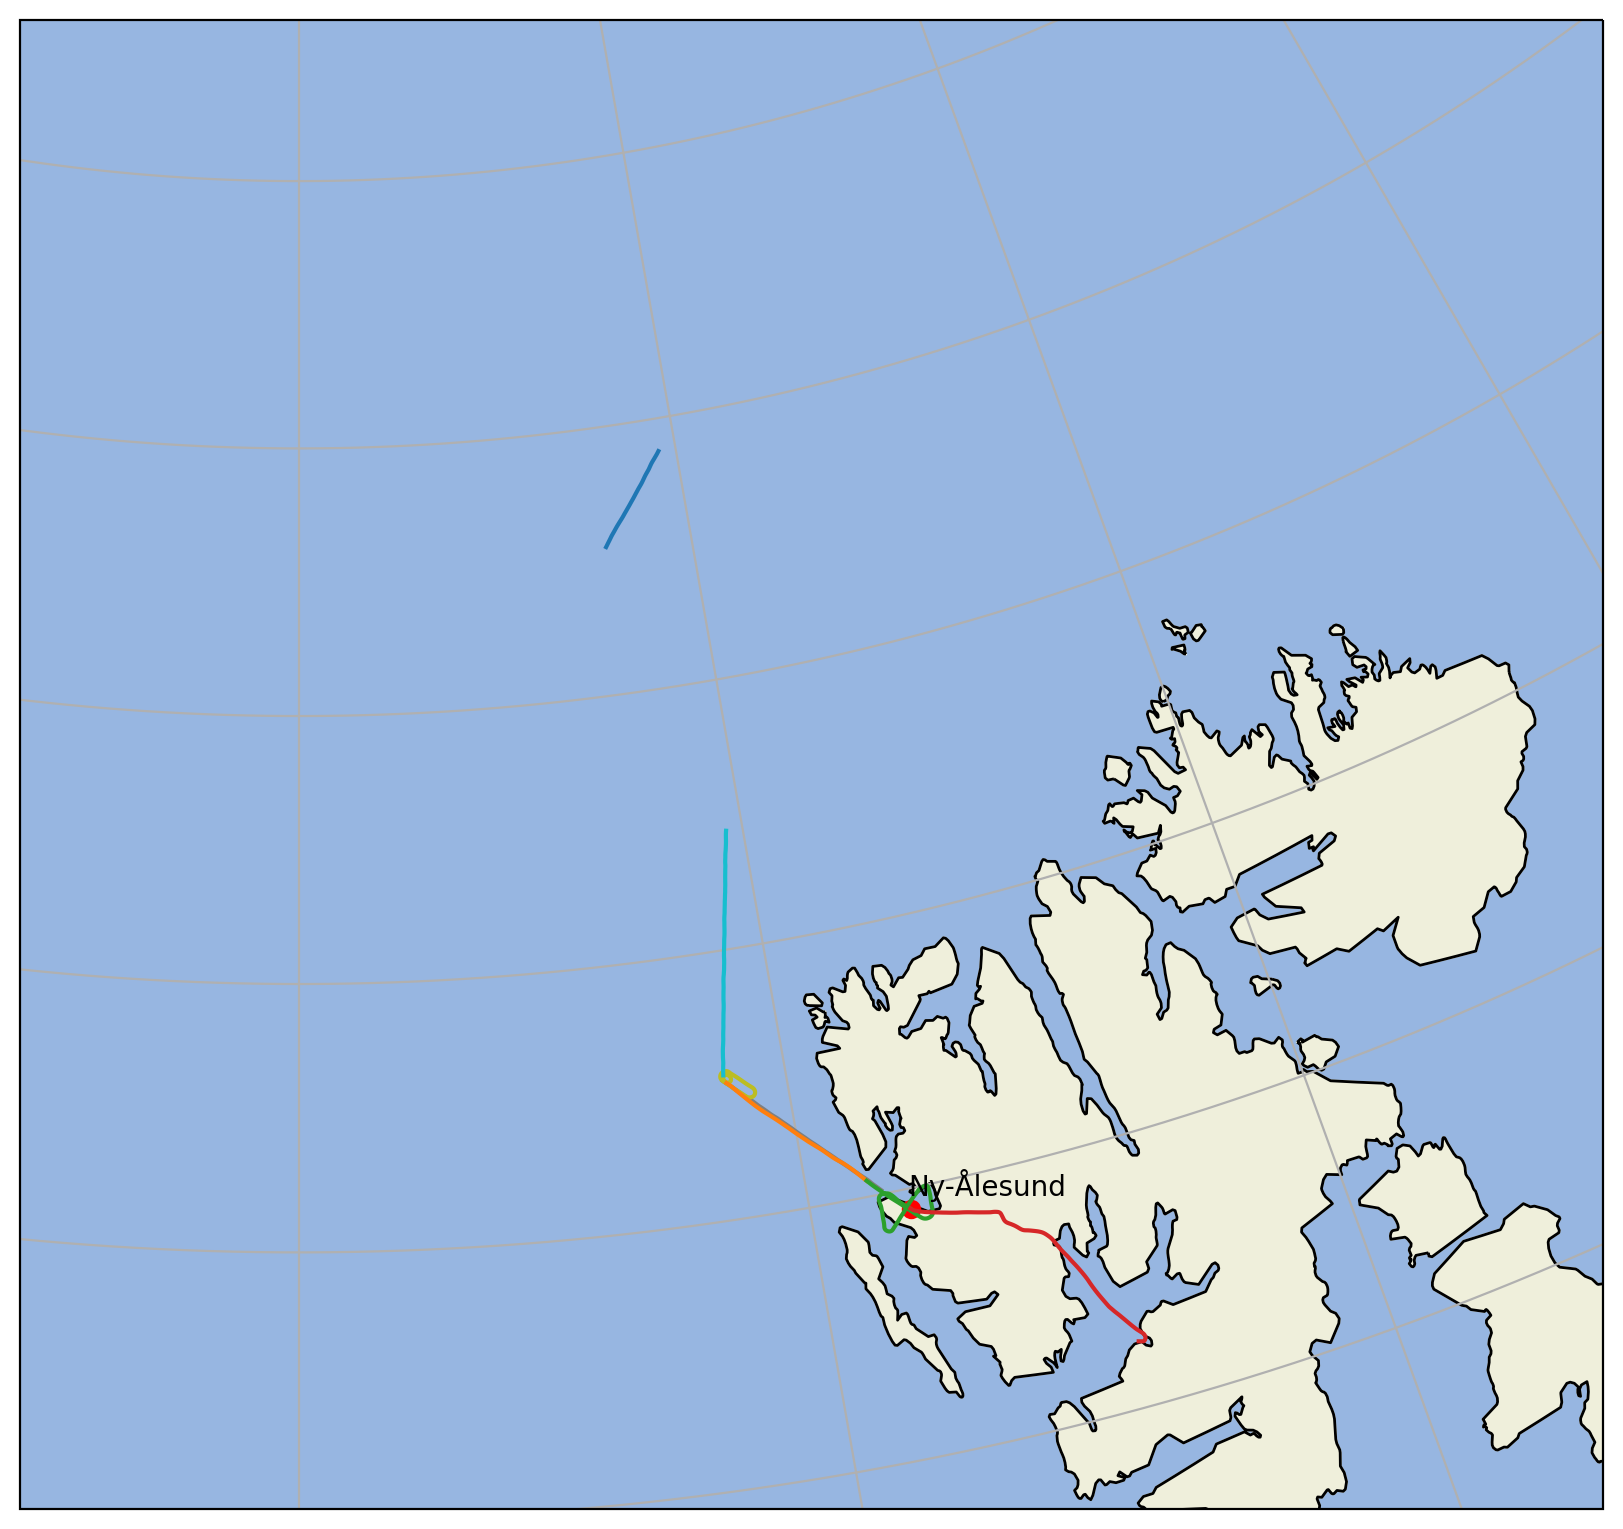

In [21]:
for l in lines:
    ll = l.pop(0)
    ll.remove()
    
lines = []
for q in queried:
    start = q['start']
    end   = q['end']
    
    line = ax.plot(ds_gps.lon.sel(time=slice(start, end)),
                   ds_gps.lat.sel(time=slice(start, end)),
                   transform=ccrs.PlateCarree())
    lines.append(line)
    
fig

But what if we want only a specific level without ascend and descend? We can require that the attribute value is strictly equal to the one, that we give, i.e. thare no other values:

In [22]:
queried = flight_query.select(attribute, value, strict=True)
queried

[{'dropsondes': [],
  'end': datetime.datetime(2017, 6, 8, 8, 25, 56),
  'irregularities': [],
  'kinds': ['high_level'],
  'levels': [9800],
  'name': 'high level 1',
  'segment_id': 'ACLOUD_P5_RF14_hl01',
  'start': datetime.datetime(2017, 6, 8, 8, 8, 54)},
 {'dropsondes': ['ACLOUD_P5_RF14_DS01'],
  'end': datetime.datetime(2017, 6, 8, 8, 58, 25),
  'irregularities': [],
  'kinds': ['high_level'],
  'levels': [9800],
  'name': 'high level 2',
  'segment_id': 'ACLOUD_P5_RF14_hl02',
  'start': datetime.datetime(2017, 6, 8, 8, 36, 30)},
 {'dropsondes': ['ACLOUD_P5_RF14_DS05'],
  'end': datetime.datetime(2017, 6, 8, 10, 0, 13),
  'irregularities': [],
  'kinds': ['high_level'],
  'levels': [9800],
  'name': 'high level 5',
  'segment_id': 'ACLOUD_P5_RF14_hl05',
  'start': datetime.datetime(2017, 6, 8, 9, 51, 33)},
 {'dropsondes': ['ACLOUD_P5_RF14_DS06'],
  'end': datetime.datetime(2017, 6, 8, 12, 5, 13),
  'irregularities': [],
  'kinds': ['high_level'],
  'levels': [9800],
  'name': 'hi

This functions only if the attribute has more values, as for level or kind. Now plot the selected elements:

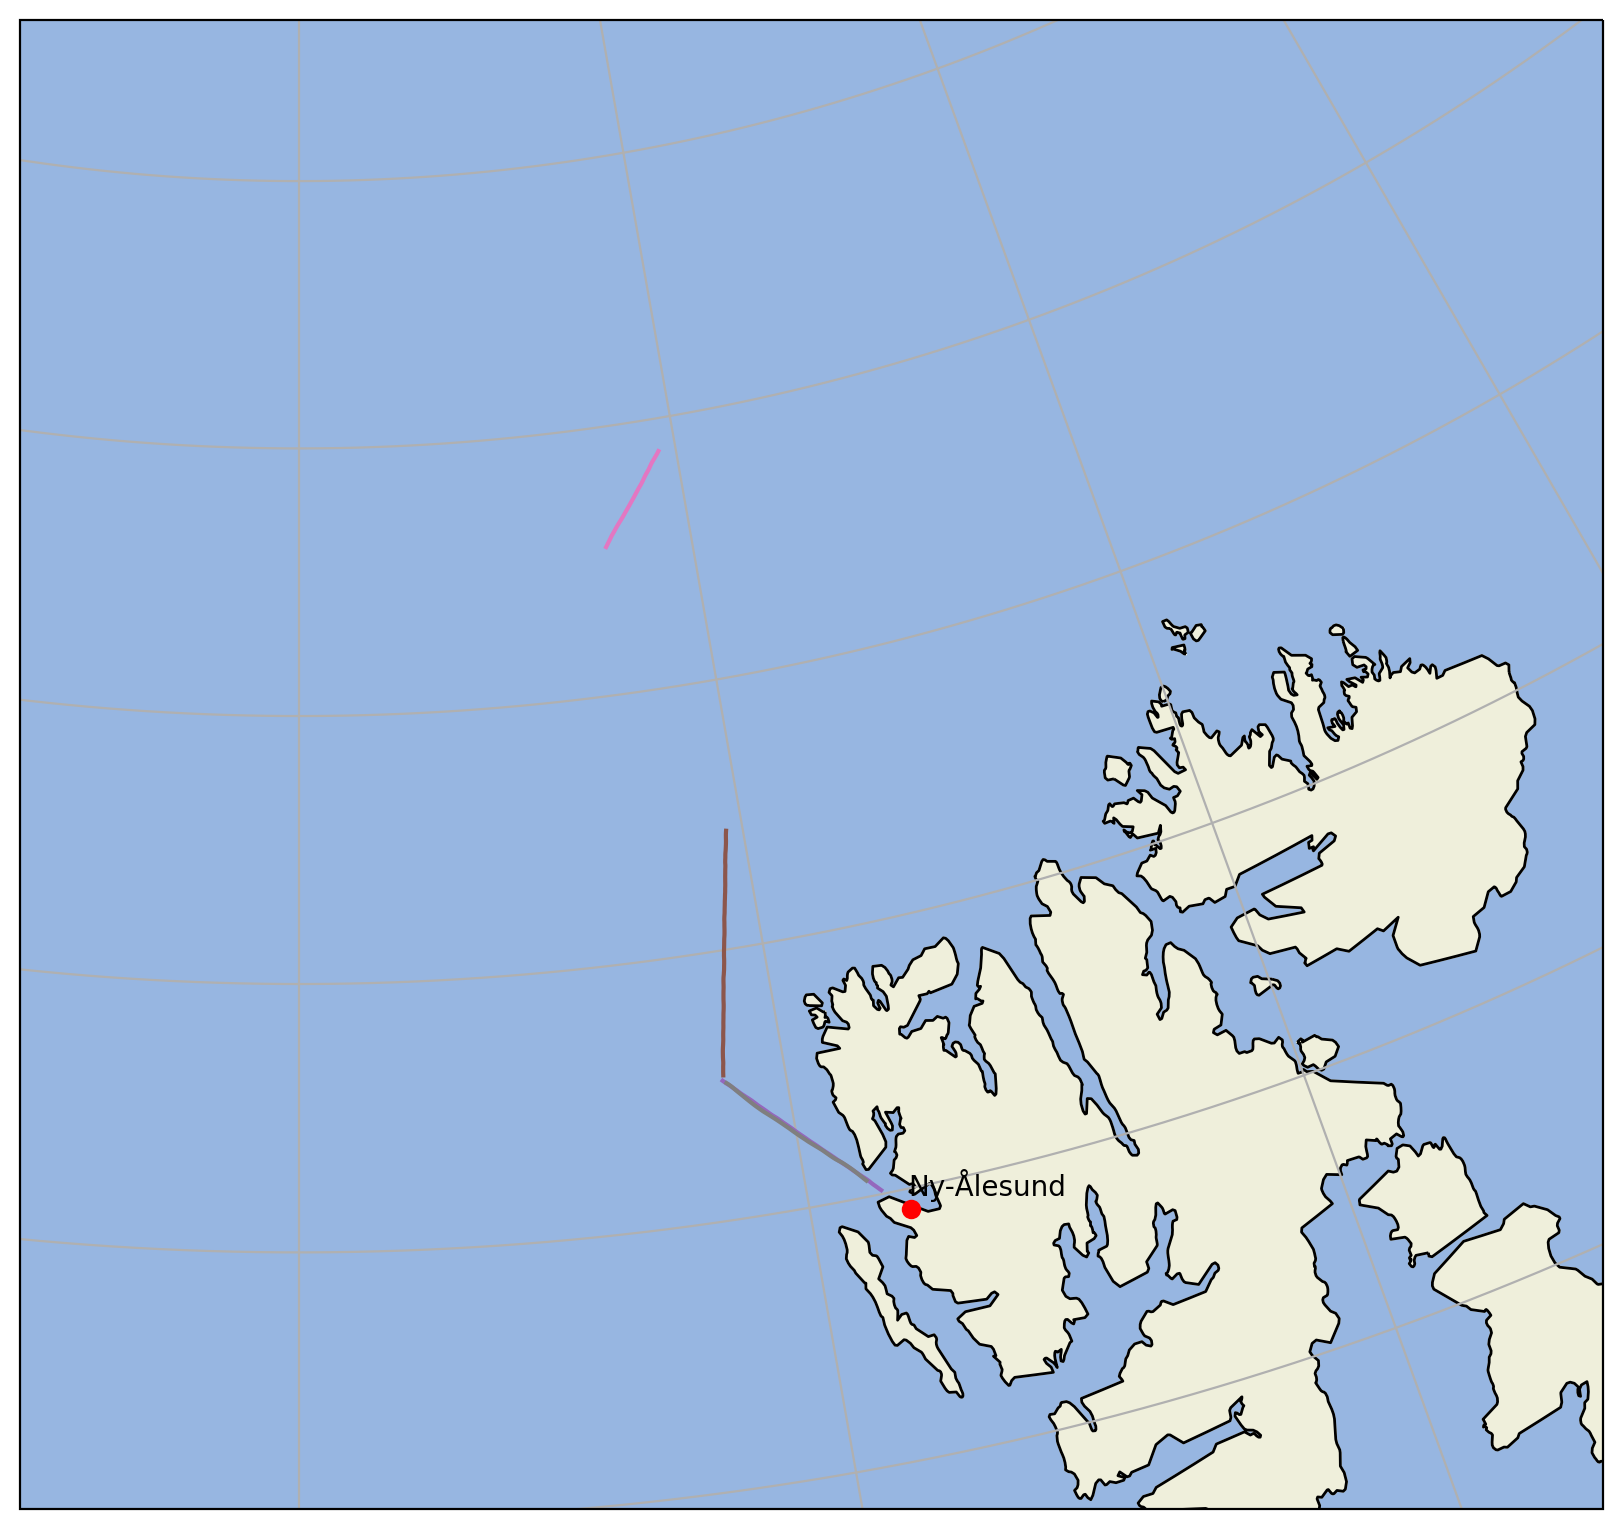

In [23]:
for l in lines:
    ll = l.pop(0)
    ll.remove()
    
lines = []
for q in queried:
    start = q['start']
    end   = q['end']
    
    line = ax.plot(ds_gps.lon.sel(time=slice(start, end)),
                   ds_gps.lat.sel(time=slice(start, end)),
                   transform=ccrs.PlateCarree())
    lines.append(line)
    
fig